In [1]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


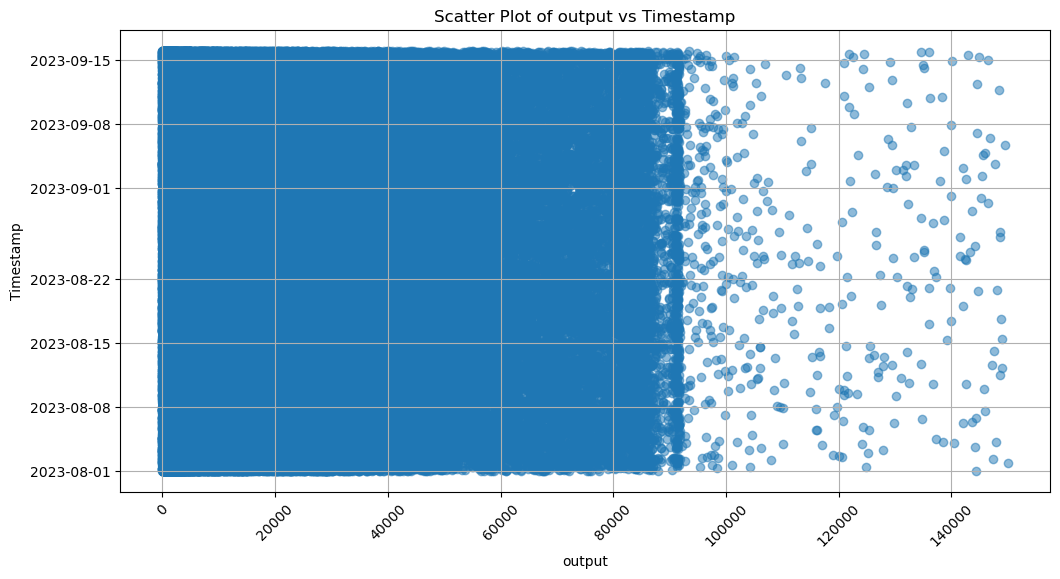

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset from the specified path
path = "C:\\Users\\adity\\Downloads\\aug23_publish.xlsx"
df = pd.read_excel(path)

# Choose the two columns you want to create a scatter plot for
x_column = "output"
y_column = "Timestamp"

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)  # Corrected the error here
plt.title(f"Scatter Plot of {x_column} vs {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Coefficients: 
 [0.19258159]
Mean squared error: 3782688115230.19
Coefficient of determination: -2457887013.44


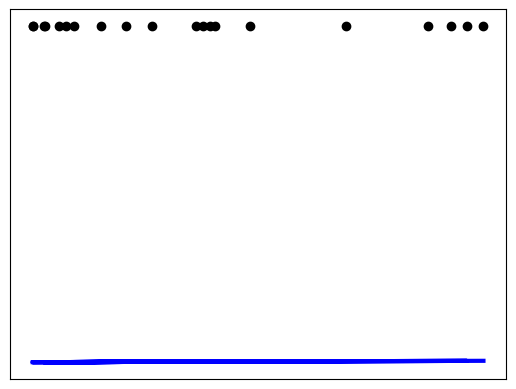

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
path = "C:\\Users\\adity\\Downloads\\aug23_publish.xlsx"
df = pd.read_excel(path)

# Convert "Timestamp" to Unix timestamps (in seconds)
df['Timestamp'] = (df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Choose your independent and dependent variables
X = df["output"].values.reshape(-1, 1)
y = df["Timestamp"].values

# Split the data into training/testing sets (you can customize the split ratio)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

path = "C:\\Users\\adity\\Downloads\\aug23_publish.xlsx"
data = pd.read_excel(path)


data['case'] = data['case'].apply(lambda x: 0 if x == 'na' else int(x))


X = data[['output', 'case']]  
y = data['tech']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

Test Set Accuracy: 0.99


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
data_path = "C:\\Users\\adity\\Downloads\\aug23_publish.xlsx"
df = pd.read_excel(data_path)

# Convert 'na' values in 'case' column to 0 and treat other values as integers
df['case'] = df['case'].apply(lambda x: 0 if x == 'na' else int(x))

# Define features (independent variables) and the target variable
features = df[['output', 'case']]
target = df['tech']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the model with the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")


Decision Tree Regressor:
Mean Squared Error: 114.25
R-squared: -0.08

k-NN Regressor:
Mean Squared Error: 113.36
R-squared: -0.07
